# APS Failure

## Exploring the dataset
Let us look at the dataset by loading and displaying a subset of the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_data_train = pd.read_csv('aps_failure_training_set.csv',
                               keep_default_na=False)
input_data_test = pd.read_csv('aps_failure_test_set.csv',
                             keep_default_na=False)
display(input_data_train.head(3))
display(input_data_train.tail(3)) 

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


Since it is already given about data shapes and attributes let us go further directly

In [3]:
#missing values as strings ?!?
input_data_train['ab_000'].values[-2]

'na'

In [4]:
input_data_train.info()
input_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 20.9+ MB


We have to do some data juggling since all columns that contains 'na' are considered to be strings. First, we have to replace 'na' with an integer. It looks like all values are positive, hence we may introduce a negative value for our missing values.

In [5]:
# replacing 'na' strings
input_data_train.replace('na','-1', inplace=True)
input_data_test.replace('na','-1', inplace=True)

In [6]:
input_data_test.tail(3)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
15997,neg,79636,-1,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,-1,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0
15999,neg,8,0,6,4,2,2,0,0,0,...,46,10,48,14,42,46,0,0,0,0


Since we want to predict failures of a system, we should assume that no company publishes such a dataset if the classes (no failure/failure) are distributed equally 

In [7]:
input_data_train['class'] = pd.Categorical(input_data_train['class']).codes
input_data_test['class'] = pd.Categorical(input_data_test['class']).codes

print(['neg', 'pos'])
print(np.bincount(input_data_train['class'].values))
print(np.bincount(input_data_test['class'].values))

['neg', 'pos']
[59000  1000]
[15625   375]


or as a histogram

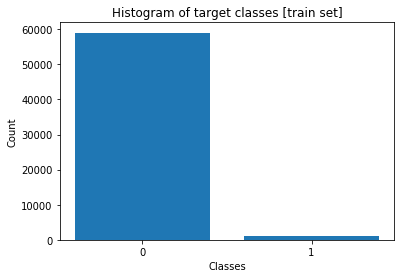

In [8]:
plt.close('all')
bins = np.bincount(input_data_train['class'].values)
plt.bar([0,1],bins)
plt.xticks([0,1])
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Histogram of target classes [train set]')
plt.show()

This info is also already given, this is just to see it pictorically

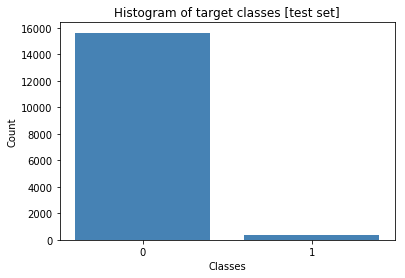

In [9]:
plt.close('all')
bins = np.bincount(input_data_test['class'].values)
plt.bar([0,1], bins, color='steelblue')
plt.xticks([0,1])
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Histogram of target classes [test set]')
plt.show()

Next, we have to split our data into X and y. We have to remember that columns containing 'na' (now -1) are strings. Therefore, we have to convert them. A conversion to floating point is okay since some values are float and we will scale the data anyhow.

In [10]:
#split data into X and y
y_train = input_data_train['class'].copy(deep=True)
X_train = input_data_train.copy(deep=True)
X_train.drop(['class'], inplace=True, axis=1)

In [11]:
y_test = input_data_test['class'].copy(deep=True)
X_test = input_data_test.copy(deep=True)
X_test.drop(['class'], inplace=True, axis=1)

In [12]:
# strings to float
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

We still have to scale the datasets

In [13]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##### Balancing the highly imbalanced data because ML algorithms are biased to more weighted results. So, using smote for reliable results which are not overfitting or underfitting i.e optimising variance and bias.

In [14]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=40)
X_train_res, y_train_res=smote.fit_sample(X_train, y_train)

We also need to balance the test data for reliable results

In [15]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=40)
X_test_res, y_test_res=smote.fit_sample(X_test, y_test)

In [16]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 1000
Before OverSampling, counts of label '0': 59000 



In [17]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 59000
After OverSampling, counts of label '0': 59000


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_validation,Y_train,Y_validation = train_test_split(X_train_res,y_train_res,test_size = 0.2,random_state = 0)

In [24]:
#DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
DTClassifier= DecisionTreeClassifier (max_depth=30, min_samples_split =5,criterion='gini',min_samples_leaf=2)
DTClassifier.fit(x_train,Y_train)
predicted_labels = DTClassifier.predict(x_validation)
accuracy_score = accuracy_score(Y_validation, predicted_labels)
print(accuracy_score)

0.9903389830508474


In [66]:
# Naive Bayees
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


gnb.fit(x_train, Y_train)
y_pred = gnb.predict(x_validation)
print("1. Accuracy: ", str(metrics.accuracy_score(Y_validation,y_pred) * 100) + "%")
print()

print("2. Confusion Matrix: ")
print(metrics.confusion_matrix(Y_validation, y_pred))

1. Accuracy:  94.688%

2. Confusion Matrix: 
[[3023  107]
 [ 225 2895]]


We are getting little low accuracy because predictors are not qualitative

In [68]:
# KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics

KNN = KNeighborsClassifier(n_neighbors=36,leaf_size=5, metric='minkowski',p=1)
KNN.fit(x_train,Y_train)
predicted_labels = KNN.predict(X_validation)
accuracy_score_knn= accuracy_score(Y_validation, predicted_labels)
print(accuracy_score_knn)


0.97504


In [19]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
SVC = SVC(C=.2, kernel='linear', gamma= 1)
SVC = SVC.fit(X_train_res, y_train_res)
# check the accuracy on the training set
print(SVC.score(X_train_res, y_train_res))
prediction = SVC.predict(X_test_res)


0.9608389830508475


In [ ]:
print(SVC.score(X_test_res, y_test_res))

In [ ]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test_res))

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, make_scorer
from tqdm import tqdm

SEED = 1

In [37]:
model_full_rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=SEED, n_jobs=-1)
model_full_rf.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [38]:
model_full_rf.score(X_test_res, y_test_res)

1.0

In [39]:
model_full_rf.score(X_train_res, y_train_res)

1.0

We could be overfitting as the accuracy's are perfect

In [40]:
y_pred = model_full_rf.predict(X_test_res)
y_pred_proba = model_full_rf.predict_proba(X_test_res)

In [41]:
print(classification_report(y_test_res, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15625
           1       1.00      1.00      1.00     15625

   micro avg       1.00      1.00      1.00     31250
   macro avg       1.00      1.00      1.00     31250
weighted avg       1.00      1.00      1.00     31250



In [42]:
tn, fp, fn, tp = confusion_matrix(y_test_res, y_pred).ravel()

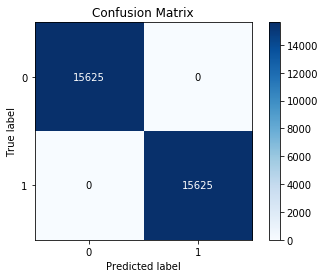

In [45]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test_res, y_pred, normalize=False)
plt.show()

By default a threshold of 0.5 is used, but this could not be the best option. To make FN errors is more expensive than to make FP, with the 0.5 threshold we have the total cost of:

In [46]:
10*fp + 500*fn

0

Let's see what happens if we move the threshold (we have a better cost)

In [47]:
y_test_predictions_high_precision = y_pred_proba[:,1] > 0.8
y_test_predictions_high_recall = y_pred_proba[:,1] > 0.1

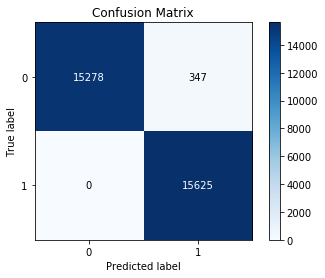

In [49]:
skplt.metrics.plot_confusion_matrix(y_test_res, y_test_predictions_high_recall, normalize=False)
plt.show()

In [51]:
10*347 + 500*0

3470

Let's try to find the best threshold

In [52]:
scores = model_full_rf.predict_proba(X_test_res)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_res, scores)

In [53]:
min_cost = np.inf
best_threshold = 0.5
costs = []
for threshold in tqdm(thresholds):
    y_pred_threshold = scores > threshold
    tn, fp, fn, tp = confusion_matrix(y_test_res, y_pred_threshold).ravel()
    cost = 10*fp + 500*fn
    costs.append(cost)
    if cost < min_cost:
        min_cost = cost
        best_threshold = threshold
print("Best threshold: {:.4f}".format(best_threshold))
print("Min cost: {:.2f}".format(min_cost))

100%|██████████| 97/97 [00:07<00:00, 12.88it/s]


Best threshold: 0.3950
Min cost: 20.00


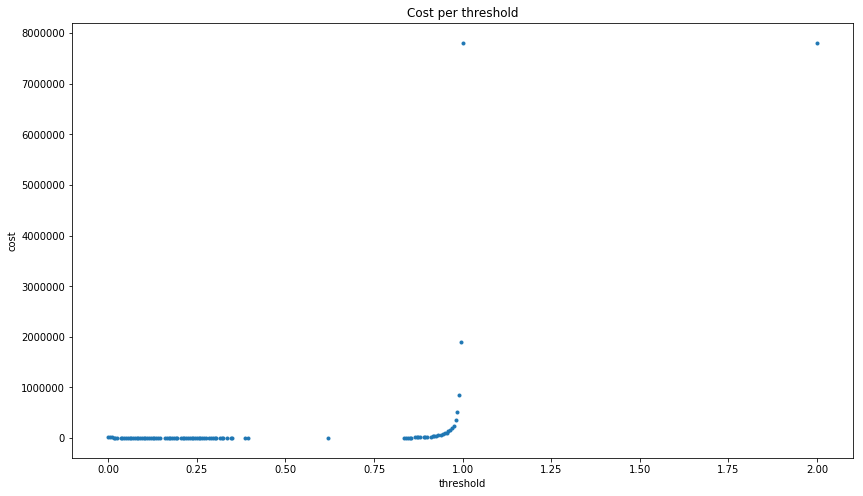

In [54]:
plt.figure(figsize=(14,8))
plt.scatter(x=thresholds, marker='.', y=costs)
plt.title('Cost per threshold')
plt.xlabel('threshold')
plt.ylabel('cost')
plt.show()

#### All the other models are scoring less except Random forest. Other ML's may score very high without balancing but that would be wrong or overfitting beacuse of bias and variance. In random forest this could be optimised. So, Random Forest is our best model.
Also tried SVM and GridCV as KNN is a lazy learner its almost like never executing so, i removed that.